## Entrada de dados

In [23]:
import pandas as pd
import numpy as np

dados_brutos = pd.read_csv('data\dados_originais\precos-semestrais-ca-2022-01.csv', sep=';')
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529424 entries, 0 to 529423
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     529424 non-null  object 
 1   Estado - Sigla     529424 non-null  object 
 2   Municipio          529424 non-null  object 
 3   Revenda            529424 non-null  object 
 4   CNPJ da Revenda    529424 non-null  object 
 5   Nome da Rua        529424 non-null  object 
 6   Numero Rua         529211 non-null  object 
 7   Complemento        113936 non-null  object 
 8   Bairro             527991 non-null  object 
 9   Cep                529424 non-null  object 
 10  Produto            529424 non-null  object 
 11  Data da Coleta     529424 non-null  object 
 12  Valor de Venda     529424 non-null  object 
 13  Valor de Compra    0 non-null       float64
 14  Unidade de Medida  529424 non-null  object 
 15  Bandeira           529424 non-null  object 
dtypes:

## Inicio da limpeza 

In [24]:

#modificando o formatos dos dados 'Data da Coletas'
dados_brutos['Data da Coleta'] = pd.to_datetime(dados_brutos['Data da Coleta'], dayfirst=True)
dados_brutos['Data da Coleta'].head()

0   2022-01-03
1   2022-01-03
2   2022-01-03
3   2022-01-03
4   2022-01-03
Name: Data da Coleta, dtype: datetime64[ns]

In [25]:
datas_selecionadas = dados_brutos['Data da Coleta'] > '2022-04-29'
dados_brutos = dados_brutos[datas_selecionadas]


dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194404 entries, 335020 to 529423
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Regiao - Sigla     194404 non-null  object        
 1   Estado - Sigla     194404 non-null  object        
 2   Municipio          194404 non-null  object        
 3   Revenda            194404 non-null  object        
 4   CNPJ da Revenda    194404 non-null  object        
 5   Nome da Rua        194404 non-null  object        
 6   Numero Rua         194313 non-null  object        
 7   Complemento        42721 non-null   object        
 8   Bairro             193842 non-null  object        
 9   Cep                194404 non-null  object        
 10  Produto            194404 non-null  object        
 11  Data da Coleta     194404 non-null  datetime64[ns]
 12  Valor de Venda     194404 non-null  object        
 13  Valor de Compra    0 non-null       flo

In [26]:
# verificando se a valores na coluna 'Valor de Compra'
dados_brutos['Valor de Compra'].unique()

array([nan])

In [27]:
dados_brutos.drop(columns=['Complemento','Valor de Compra'], inplace=True)
# Coluna 'Valor de Compra' deletadas

In [28]:
dados_brutos['Valor de Venda'].info()

<class 'pandas.core.series.Series'>
Int64Index: 194404 entries, 335020 to 529423
Series name: Valor de Venda
Non-Null Count   Dtype 
--------------   ----- 
194404 non-null  object
dtypes: object(1)
memory usage: 3.0+ MB


In [29]:
#tocando vigula por ponto e nudando de string para float
valores_virgula = dados_brutos['Valor de Venda'].tolist()
valores_ponto = [x.replace(',', '.') for x in valores_virgula]
dados_brutos['Valor de Venda'] = valores_ponto
dados_brutos['Valor de Venda'] = dados_brutos['Valor de Venda'].astype(float)
dados_brutos['Valor de Venda'].info()

<class 'pandas.core.series.Series'>
Int64Index: 194404 entries, 335020 to 529423
Series name: Valor de Venda
Non-Null Count   Dtype  
--------------   -----  
194404 non-null  float64
dtypes: float64(1)
memory usage: 3.0 MB


<AxesSubplot:ylabel='Frequency'>

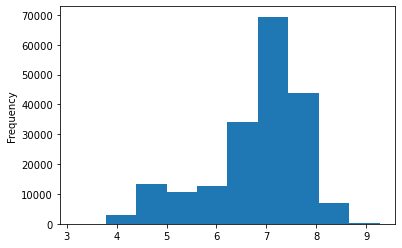

In [30]:
dados_brutos['Valor de Venda'].plot(kind='hist')

In [34]:
dados_brutos.to_csv('data\dados_limpos\dados.csv', sep=',', index=False)

In [36]:
# verificando o arquivo gerado 
dados_b = pd.read_csv('data\dados_limpos\dados.csv')
dados_b.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,AREAL,69906-119,GASOLINA,2022-05-02,7.59,R$ / litro,VIBRA ENERGIA
1,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,AREAL,69906-119,ETANOL,2022-05-02,6.09,R$ / litro,VIBRA ENERGIA
2,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,AREAL,69906-119,DIESEL,2022-05-02,7.29,R$ / litro,VIBRA ENERGIA
3,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,AREAL,69906-119,GASOLINA ADITIVADA,2022-05-02,7.66,R$ / litro,VIBRA ENERGIA
4,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,AREAL,69906-119,DIESEL S10,2022-05-02,7.39,R$ / litro,VIBRA ENERGIA
